# Approximating Pi by Monte Carlo Integration

The area $ A $ of a circle is $ A = \pi r^{2} $, where $ r > 0 $ is the radius. When $ r = 1 $, the area is $ \pi $.

The area of a $ \frac{1}{4}$-th circle inside a $ 1 x 1 $ square is $ \frac{\pi}{4} $.

We generate points distributed uniformly over the $ 1 x 1 $ square, and then count the percentage of the points which lie inside the quarter circle.

In [1]:
import numpy as np
from numpy.random import RandomState
import matplotlib.pyplot as plt
import timeit

n = 1_000_000

## With NumPy's Vectorized Operations

Approximate pi: 3.141372
NumPy's value for pi: 3.141592653589793


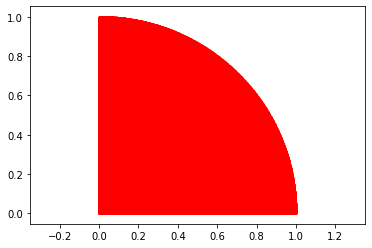

In [2]:
rng = RandomState(1729)

x = rng.uniform(low=0, high=1, size=n)
y = rng.uniform(low=0, high=1, size=n)
sum_of_squares = x * x + y * y
mask = sum_of_squares < 1

pi_estimate = (np.sum(x * x + y * y < 1) / n) * 4
print(f"Approximate pi: {pi_estimate}")
print(f"NumPy's value for pi: {np.pi}")

plt.scatter(x[mask], y[mask], s=1, c="red")
plt.axis('equal')
plt.show()

## With For-Loop

In [3]:
rando = RandomState(1729)
count = 0

for i in range(n):
    u = rando.uniform(low=0, high=1)
    v = rando.uniform(low=0, high=1)
    if (u * u + v * v) < 1:
        count += 1

pi_est = (count / n) * 4
print(f"Approximate pi: {pi_est}")
print(f"NumPy's value for pi: {np.pi}")

Approximate pi: 3.139312
NumPy's value for pi: 3.141592653589793


## Comparison of Vectorization Versus For-Loop by Using Timeit Library

In [4]:
repeats = 100

# Setup statement executed once
setup = """\
import numpy as np
from numpy.random import RandomState
import matplotlib.pyplot as plt
import time
import timeit

n = 1_000_000
rng_x = RandomState(1729)
rng_y = RandomState(88)"""

# Actual statement executed for repeats times
vectorized_stmt = """\
x = rng_x.uniform(low=0, high=1, size=n)
y = rng_y.uniform(low=0, high=1, size=n)
sum_of_squares = x * x + y * y
mask = sum_of_squares < 1"""

vectorized_time = timeit.Timer(stmt=vectorized_stmt, setup=setup).timeit(number=repeats)
print(f"Vectorized average time over {repeats} repeats: {vectorized_time/repeats:.6f}")

# Actual statement executed for repeats times
for_stmt = """\
count = 0
for i in range(n):
    u = rng_x.uniform(low=0, high=1)
    v = rng_y.uniform(low=0, high=1)
    if (u * u + v * v) < 1:
        count += 1
"""

for_time = timeit.Timer(stmt=for_stmt, setup=setup).timeit(number=repeats)
print(f"For-loop average time over {repeats} repeats: {for_time/repeats:.6f}")


Vectorized average time over 100 repeats: 0.031701
For-loop average time over 100 repeats: 1.650312
